In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
df = pd.read_csv('training.csv')

In [3]:
df['MMRAcquisitionAuctionAveragePrice'].fillna(df['MMRAcquisitionAuctionAveragePrice'].median(), inplace = True)
df['MMRAcquisitionAuctionCleanPrice'].fillna(df['MMRAcquisitionAuctionCleanPrice'].median(), inplace = True)
df['MMRAcquisitionRetailAveragePrice'].fillna(df['MMRAcquisitionRetailAveragePrice'].median(), inplace = True)
df['MMRAcquisitonRetailCleanPrice'].fillna(df['MMRAcquisitonRetailCleanPrice'].median(), inplace = True)
df['MMRCurrentAuctionAveragePrice'].fillna(df['MMRCurrentAuctionAveragePrice'].median(), inplace = True)
df['MMRCurrentAuctionCleanPrice'].fillna(df['MMRCurrentAuctionCleanPrice'].median(), inplace = True)
df['MMRCurrentRetailAveragePrice'].fillna(df['MMRCurrentRetailAveragePrice'].median(), inplace = True)
df['MMRCurrentRetailCleanPrice'].fillna(df['MMRCurrentRetailCleanPrice'].median(), inplace = True)

In [4]:
df['MMR_factor'] = ( df['MMRAcquisitionAuctionAveragePrice'] + df['MMRAcquisitonRetailCleanPrice'] + df['MMRCurrentAuctionCleanPrice'] + df['MMRCurrentRetailAveragePrice']) / 4

In [5]:
df.isnull().sum() # Check if there are some numerical attributes with missing values

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1911
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2573
WheelType                             2577
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice          0
MMRAcquisitionRetailAveragePrice         0
MMRAcquisitonRetailCleanPrice            0
MMRCurrentAuctionAveragePrice            0
MMRCurrentA

In [6]:
df_new = df[['VehicleAge','VehOdo','MMR_factor','VehBCost','WarrantyCost']] #Create new dataframe the variables that we'll use in the clustering

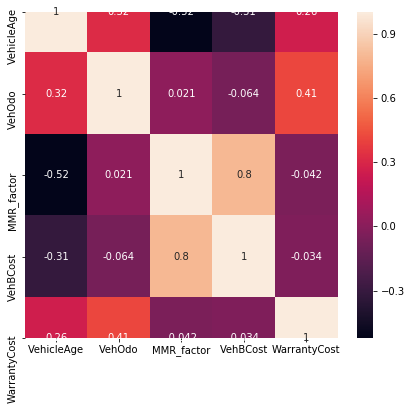

In [7]:
# check the correlation because we don't want clusters with two attributes highly correlated
corr = df_new.corr()
plt.subplots(figsize =(7, 6))
hm = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [8]:
Q1 =  df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1

In [9]:
df_in = df_new[~((df_new < (Q1 - 1.5 * IQR)) |(df_new > (Q3 + 1.5 * IQR))).any(axis=1)]

df_in.shape

(56150, 5)

In [10]:
df_in.isnull().sum()

VehicleAge      0
VehOdo          0
MMR_factor      0
VehBCost        0
WarrantyCost    0
dtype: int64

In [14]:
#K-MEANS

In [15]:
df1 = df_new[['WarrantyCost','VehicleAge','VehBCost']]

In [16]:
X = MinMaxScaler().fit_transform(df1.values)

In [17]:
for i in range(2,13):
    kmeans = KMeans(n_clusters = i, n_init = 7, max_iter = 150)
    kmeans.fit(X)
    print("n_clusters = {}".format(i))
    print('SSE %s' % kmeans.inertia_)
    print('Silhouette %s' % silhouette_score(X, kmeans.labels_,sample_size=10000))

n_clusters = 2
SSE 1228.8129778425907
Silhouette 0.46311616696845265
n_clusters = 3
SSE 833.8724718230753
Silhouette 0.39310123182341494
n_clusters = 4
SSE 692.5574390318401
Silhouette 0.35750847867699354
n_clusters = 5
SSE 601.0756230089123
Silhouette 0.34968759228923507
n_clusters = 6
SSE 517.9343535069573
Silhouette 0.33319014967110716
n_clusters = 7
SSE 457.88998666976727
Silhouette 0.33922630399455206
n_clusters = 8
SSE 401.71641871187825
Silhouette 0.3464737196427404
n_clusters = 9
SSE 361.3864093633099
Silhouette 0.34170019805936197
n_clusters = 10
SSE 325.95841483352433
Silhouette 0.3590178569321284
n_clusters = 11
SSE 302.5981649833865
Silhouette 0.3599173886286306
n_clusters = 12
SSE 283.85813124430933
Silhouette 0.3821050671367631


In [11]:
sse_list = list()
max_k = 20
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=7, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

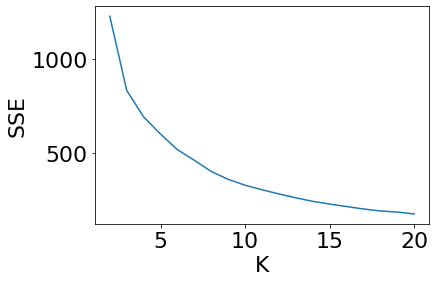

In [12]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [18]:
#DBSCAN

In [18]:
df2 = df_new[['VehOdo','WarrantyCost','VehBCost']]

In [19]:
Y = StandardScaler().fit_transform(df2.values)

In [25]:
# eps = 0.1
for i in range(30,211,30):
    dbscan = DBSCAN(eps = 0.1, min_samples = i)
    dbscan.fit(Y)
    print("min_samples = {}".format(i))
    print('Silhouette %s' % silhouette_score(Y, dbscan.labels_,sample_size=10000))

min_samples = 30
Silhouette -0.4884908895992818
min_samples = 60
Silhouette -0.4183850379317756
min_samples = 90
Silhouette -0.3269989204157812
min_samples = 120
Silhouette -0.044540971644897516
min_samples = 150
Silhouette 0.014737845029247507
min_samples = 180


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [29]:
# eps = 0.2
for i in range(50,1001,50):
    dbscan = DBSCAN(eps = 0.2, min_samples = i)
    dbscan.fit(Y)
    print("min_samples = {}".format(i))
    print('Silhouette %s' % silhouette_score(Y, dbscan.labels_,sample_size=10000))

min_samples = 50
Silhouette -0.21384851438495256
min_samples = 100
Silhouette -0.3787238271136395
min_samples = 150
Silhouette -0.371462921454348
min_samples = 200
Silhouette -0.3328492235867122
min_samples = 250
Silhouette -0.29950667760474436
min_samples = 300
Silhouette -0.23143035599587547
min_samples = 350
Silhouette 0.01989771089579389
min_samples = 400
Silhouette 0.01302149755049664
min_samples = 450


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [30]:
# eps = 0.3
for i in range(50,1001,50):
    dbscan = DBSCAN(eps = 0.3, min_samples = i)
    dbscan.fit(Y)
    print("min_samples = {}".format(i))
    print('Silhouette %s' % silhouette_score(Y, dbscan.labels_,sample_size=10000))

min_samples = 50
Silhouette 0.40048301372541617
min_samples = 100
Silhouette 0.31387300505875704
min_samples = 150
Silhouette 0.2553441054050688
min_samples = 200
Silhouette 0.22196228769341989
min_samples = 250
Silhouette 0.17993994498265214
min_samples = 300
Silhouette 0.13443027976304475
min_samples = 350
Silhouette 0.08548582160104888
min_samples = 400
Silhouette -0.07444781977190852
min_samples = 450
Silhouette -0.22286425294834297
min_samples = 500
Silhouette -0.23329616661842478
min_samples = 550
Silhouette -0.24404351377035483
min_samples = 600
Silhouette -0.1854787549750711
min_samples = 650
Silhouette -0.18714806128768
min_samples = 700
Silhouette -0.19753158933560624
min_samples = 750
Silhouette -0.21439931143991858
min_samples = 800
Silhouette 0.023171797309676556
min_samples = 850
Silhouette 0.018832533250768814
min_samples = 900


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [31]:
# eps = 0.4
for i in range(50,1001,50):
    dbscan = DBSCAN(eps = 0.4, min_samples = i)
    dbscan.fit(Y)
    print("min_samples = {}".format(i))
    print('Silhouette %s' % silhouette_score(Y, dbscan.labels_,sample_size=10000))

min_samples = 50
Silhouette 0.4044763840386404
min_samples = 100
Silhouette 0.4915915691918651
min_samples = 150
Silhouette 0.410468294779081
min_samples = 200
Silhouette 0.35305244729514806
min_samples = 250
Silhouette 0.3256105479565006
min_samples = 300
Silhouette 0.2999439119313263
min_samples = 350
Silhouette 0.2883269032892722
min_samples = 400
Silhouette 0.263560784171981
min_samples = 450
Silhouette 0.25155690449046736
min_samples = 500
Silhouette 0.23898459823024423
min_samples = 550
Silhouette 0.2098454536587753
min_samples = 600
Silhouette 0.18124773924701612
min_samples = 650
Silhouette 0.1685561180506191
min_samples = 700
Silhouette 0.1458383853326119
min_samples = 750
Silhouette 0.12428826628306033
min_samples = 800
Silhouette 0.1097098275855703
min_samples = 850
Silhouette 0.07117020432371379
min_samples = 900
Silhouette -0.07933242653106395
min_samples = 950
Silhouette -0.0962110859553414
min_samples = 1000
Silhouette -0.19942476264673084


In [32]:
# eps = 0.5
for i in range(50,1001,50):
    dbscan = DBSCAN(eps = 0.5, min_samples = i)
    dbscan.fit(Y)
    print("min_samples = {}".format(i))
    print('Silhouette %s' % silhouette_score(Y, dbscan.labels_,sample_size=10000))

min_samples = 50
Silhouette 0.607718801883096
min_samples = 100
Silhouette 0.5639988316727242
min_samples = 150
Silhouette 0.5417443646183114
min_samples = 200
Silhouette 0.4991510308445336
min_samples = 250
Silhouette 0.46294238285193084
min_samples = 300
Silhouette 0.4365864231806981
min_samples = 350
Silhouette 0.40927604330494916
min_samples = 400
Silhouette 0.39673567258814735
min_samples = 450
Silhouette 0.3862989671175045
min_samples = 500
Silhouette 0.35988547751172206
min_samples = 550
Silhouette 0.3393128210882844
min_samples = 600
Silhouette 0.3334987520237789
min_samples = 650
Silhouette 0.3225010957674069
min_samples = 700
Silhouette 0.3098221085956909
min_samples = 750
Silhouette 0.29378837220056175


KeyboardInterrupt: 

In [20]:
# eps = 0.6
for i in range(50,1001,50):
    dbscan = DBSCAN(eps = 0.6, min_samples = i)
    dbscan.fit(Y)
    print("min_samples = {}".format(i))
    print('Silhouette %s' % silhouette_score(Y, dbscan.labels_,sample_size=10000))

min_samples = 50
Silhouette 0.5576499749008307
min_samples = 100
Silhouette 0.6204016521395235
min_samples = 150
Silhouette 0.6003183657606366
min_samples = 200
Silhouette 0.5872601082513021
min_samples = 250
Silhouette 0.5829702736013571
min_samples = 300
Silhouette 0.5711603228114412
min_samples = 350
Silhouette 0.5428481061782049
min_samples = 400
Silhouette 0.5309596649707051
min_samples = 450
Silhouette 0.4940576075851003
min_samples = 500
Silhouette 0.47815089143735395


KeyboardInterrupt: 

In [34]:
# eps = 0.7
for i in range(50,1001,50):
    dbscan = DBSCAN(eps = 0.7, min_samples = i)
    dbscan.fit(Y)
    print("min_samples = {}".format(i))
    print('Silhouette %s' % silhouette_score(Y, dbscan.labels_,sample_size=10000))

min_samples = 50
Silhouette 0.562635121821143
min_samples = 100
Silhouette 0.6147119355048095
min_samples = 150
Silhouette 0.6278034730194381
min_samples = 200
Silhouette 0.6074591456348529
min_samples = 250
Silhouette 0.6034509588095605
min_samples = 300
Silhouette 0.6062320491484188
min_samples = 350
Silhouette 0.5944095367946137


KeyboardInterrupt: 

In [35]:
# eps = 0.8
for i in range(50,1001,50):
    dbscan = DBSCAN(eps = 0.8, min_samples = i)
    dbscan.fit(Y)
    print("min_samples = {}".format(i))
    print('Silhouette %s' % silhouette_score(Y, dbscan.labels_,sample_size=10000))

min_samples = 50
Silhouette 0.6281609084115138
min_samples = 100
Silhouette 0.6179230434900197
min_samples = 150
Silhouette 0.6179306593688345
min_samples = 200
Silhouette 0.6376689140768189
min_samples = 250
Silhouette 0.6350198168575691
min_samples = 300
Silhouette 0.6419620169892296
min_samples = 350
Silhouette 0.6165141286519501
min_samples = 400
Silhouette 0.6258256333703522
min_samples = 450
Silhouette 0.6369717129254131
min_samples = 500
Silhouette 0.6037323876198878
min_samples = 550
Silhouette 0.607033182298938
min_samples = 600
Silhouette 0.6038282997361283
min_samples = 650
Silhouette 0.6070955168370272
min_samples = 700
Silhouette 0.5986438394291432
min_samples = 750
Silhouette 0.599591030442675


KeyboardInterrupt: 

In [21]:
# eps = 0.9
for i in range(50,1001,50):
    dbscan = DBSCAN(eps = 0.9, min_samples = i)
    dbscan.fit(Y)
    print("min_samples = {}".format(i))
    print('Silhouette %s' % silhouette_score(Y, dbscan.labels_,sample_size=10000))

min_samples = 50
Silhouette 0.5693540320720931
min_samples = 100
Silhouette 0.5245211759336448
min_samples = 150
Silhouette 0.629709427009783
min_samples = 200
Silhouette 0.6485165083549862
min_samples = 250
Silhouette 0.6396197026730959
min_samples = 300
Silhouette 0.6301378404589217
min_samples = 350
Silhouette 0.6365672389593022
min_samples = 400
Silhouette 0.6381652008913932
min_samples = 450
Silhouette 0.6359612371928111
min_samples = 500
Silhouette 0.628418101935661
min_samples = 550
Silhouette 0.6267662235750205
min_samples = 600
Silhouette 0.6226175432386332
min_samples = 650
Silhouette 0.6209429681983093


KeyboardInterrupt: 

In [30]:
# eps = 1.2
for i in range(5,16,5):
    dbscan = DBSCAN(eps = 1.2, min_samples = i)
    dbscan.fit(Y)
    print("min_samples = {}".format(i))
    print('Silhouette %s' % silhouette_score(Y, dbscan.labels_,sample_size=10000))

min_samples = 5
Silhouette 0.7692531788137118
min_samples = 10
Silhouette 0.7266106846988505
min_samples = 15
Silhouette 0.7652858448816058


In [54]:
np.unique(dbscan.labels_,return_counts = True)

(array([-1,  0,  1], dtype=int64), array([   22, 58360,     4], dtype=int64))

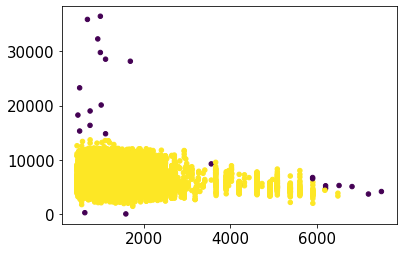

In [52]:
plt.scatter(df2['WarrantyCost'], df2['VehBCost'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [64]:
#BEST VAULES
# eps = 0.8
for i in range(3,14):
    dbscan = DBSCAN(eps = 0.8, min_samples = i)
    dbscan.fit(Y)
    print("min_samples = {}".format(i))
    print('Silhouette %s' % silhouette_score(Y, dbscan.labels_,sample_size=10000))

min_samples = 3
Silhouette 0.7044706598530779
min_samples = 4
Silhouette 0.7370815064045981
min_samples = 5
Silhouette 0.770560357023911
min_samples = 6
Silhouette 0.767415164652231
min_samples = 7
Silhouette 0.7527106854302319
min_samples = 8
Silhouette 0.6681390661182484
min_samples = 9
Silhouette 0.6375187325850155
min_samples = 10
Silhouette 0.6442641210348882
min_samples = 11
Silhouette 0.6534930063926103
min_samples = 12
Silhouette 0.7314822661546245
min_samples = 13
Silhouette 0.5922680766189478


In [57]:
# eps = 0.9
for i in range(3,11):
    dbscan = DBSCAN(eps = 0.9, min_samples = i)
    dbscan.fit(Y)
    print("min_samples = {}".format(i))
    print('Silhouette %s' % silhouette_score(Y, dbscan.labels_,sample_size=10000))

min_samples = 3
Silhouette 0.7139868919059019
min_samples = 4
Silhouette 0.7454747132119052
min_samples = 5
Silhouette 0.7828893800467036
min_samples = 6
Silhouette 0.7884923805136261
min_samples = 7
Silhouette 0.7842234608930715
min_samples = 8
Silhouette 0.7943360075424771
min_samples = 9
Silhouette 0.7906445435534225
min_samples = 10
Silhouette 0.7073256377333815


In [58]:
# eps = 0.7
for i in range(1,6):
    dbscan = DBSCAN(eps = 0.7, min_samples = i)
    dbscan.fit(Y)
    print("min_samples = {}".format(i))
    print('Silhouette %s' % silhouette_score(Y, dbscan.labels_,sample_size=10000))

min_samples = 1
Silhouette 0.20720823973137475
min_samples = 2
Silhouette 0.7189633166766601
min_samples = 3
Silhouette 0.47336137153198
min_samples = 4
Silhouette 0.6634752778810625
min_samples = 5
Silhouette 0.6696435654625232


In [60]:
# eps = 0.6
for i in range(5,10):
    dbscan = DBSCAN(eps = 0.6, min_samples = i)
    dbscan.fit(Y)
    print("min_samples = {}".format(i))
    print('Silhouette %s' % silhouette_score(Y, dbscan.labels_,sample_size=20000))

min_samples = 5
Silhouette 0.765433832329644
min_samples = 6
Silhouette 0.6584480390123234
min_samples = 7
Silhouette 0.6924130021608461
min_samples = 8
Silhouette 0.644188355627617
min_samples = 9
Silhouette 0.4311281484119383


In [62]:
# eps = 0.5
for i in range(1,5):
    dbscan = DBSCAN(eps = 0.5, min_samples = i)
    dbscan.fit(Y)
    print("min_samples = {}".format(i))
    print('Silhouette %s' % silhouette_score(Y, dbscan.labels_,sample_size=20000))

min_samples = 1
Silhouette 0.02716921430309617
min_samples = 2
Silhouette 0.3680271943132613
min_samples = 3
Silhouette 0.3844279954269243
min_samples = 4
Silhouette 0.4637893836233076
